In [1]:
import pandas as pd  # To use DataFrames
import numpy as np  # To use np.arrays

# To plot
import matplotlib.pyplot as plt
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "notebook" # to be replaced by "iframe" if working on JULIE


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Import dataset
df = pd.read_csv("https://storage.googleapis.com/jedha-projects/Walmart_Store_sales.csv")
print("Loading dataset...")
print("...Done.")
print()

Loading dataset...
...Done.



In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


## Exploratory Data Analysis and Preprocessing

In [4]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
df_desc = df.describe(include='all')
display(df_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])   # Calcul le & des valeurs manquantes de chaque colonne.

Number of rows : 150

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092



Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [4]:
# Unique values for each feature
df.nunique().sort_values()

Holiday_Flag      2
Store            20
Date             85
Unemployment    104
Fuel_Price      120
Temperature     130
CPI             135
Weekly_Sales    136
dtype: int64

In [5]:
# Drop rows with missing values in Weekly_Sales it's not advisable to fill missing values in target.
df.dropna(subset=['Weekly_Sales'], inplace=True)

# Display the modified DataFrame
print(df)

     Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price   
0      6.0  18-02-2011    1572117.54           NaN        59.61       3.045  \
1     13.0  25-03-2011    1807545.43           0.0        42.38       3.435   
3     11.0         NaN    1244390.03           0.0        84.57         NaN   
4      6.0  28-05-2010    1644470.66           0.0        78.89       2.759   
5      4.0  28-05-2010    1857533.70           0.0          NaN       2.756   
6     15.0  03-06-2011     695396.19           0.0        69.80       4.069   
7     20.0  03-02-2012    2203523.20           0.0        39.93       3.617   
8     14.0  10-12-2010    2600519.26           0.0        30.54       3.109   
9      3.0         NaN     418925.47           0.0        60.12       3.555   
10     8.0  19-08-2011     895066.50           0.0        82.92       3.554   
11    18.0  15-10-2010    1029618.10           0.0        52.02       2.878   
12     7.0  13-05-2011     414094.05           0.0  

In [6]:
# Checking for negative sales values
df.loc[df['Weekly_Sales']<=0]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [7]:
# # Replacing missing values from Holiday_flag by 0 (not holiday)
# df["Holiday_Flag"] = df["Holiday_Flag"].replace(np.nan, 0)

In [8]:
# Let's check if we still have missing values

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0]) 

Percentage of missing values: 


Store            0.000000
Date            13.235294
Weekly_Sales     0.000000
Holiday_Flag     8.088235
Temperature     11.029412
Fuel_Price       8.823529
CPI              8.088235
Unemployment    10.294118
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         136 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  125 non-null    float64
 4   Temperature   121 non-null    float64
 5   Fuel_Price    124 non-null    float64
 6   CPI           125 non-null    float64
 7   Unemployment  122 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.6+ KB


In [10]:
# Replace missing values from Holiday_flag by the most frequent
df["Holiday_Flag"] = df["Holiday_Flag"].replace(np.nan, 0)

In [11]:
#converting trans_date_trans_time into datetime
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Creating usable features from the Date column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek     # Monday corresponds to 0, Sunday corresponds to 6 etc...

# # Dropping Date column 
# df = df.drop('Date', axis=1)

# Display DataFrame
df.head()

/tmp/ipykernel_10617/3773462694.py:2: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_10617/3773462694.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,2011-02-18,1572117.54,0.0,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  136 non-null    float64       
 4   Temperature   121 non-null    float64       
 5   Fuel_Price    124 non-null    float64       
 6   CPI           125 non-null    float64       
 7   Unemployment  122 non-null    float64       
 8   Year          118 non-null    float64       
 9   Month         118 non-null    float64       
 10  Day           118 non-null    float64       
 11  Day_of_week   118 non-null    float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 13.8 KB


### Data distribution : Target

In [13]:
# Separate target variable Y from features X

print("Separating labels from features...")
# Y = df["Weekly_Sales"]
# X = df.drop('Weekly_Sales', axis=1)

features_list = ["Store","Holiday_Flag", "Temperature", "Fuel_Price", "CPI" , "Unemployment", "Year", "Month", "Day", "Day_of_week"]
target_variable = ["Weekly_Sales"]

X = df.loc[:,features_list]
Y = df.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())



Separating labels from features...
...Done.

Y : 
   Weekly_Sales
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment   
0    6.0           0.0        59.61       3.045  214.777523         6.858  \
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

     Year  Month   Day  Day_of_week  
0  2011.0    2.0  18.0          4.0  
1  2011.0    3.0  25.0          4.0  
3     NaN    NaN   NaN          NaN  
4  2010.0    5.0  28.0          4.0  
5  2010.0    5.0  28.0          4.0  


In [14]:
# # Separate features into categorical and numerical

# categorical_features = []
# numerical_features = []
# threshold = 80 # This is just an estimation, a categorial feature is likely to have less than 100 unique values

# for feature in X:
#     if df[feature].nunique() <= threshold:
#         categorical_features.append(feature)
#     else:
#         numerical_features.append(feature)

# print("The Dataset has {} numerical & {} categorical features.".format(len(categorical_features),len(numerical_features)))
# print("Numerical features are {}".format(numerical_features))
# print("Categorical features are {}".format(categorical_features))

In [15]:
features_outliers = ["Temperature", "Fuel_Price", "CPI" , "Unemployment"]
features_outliers

['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

In [16]:
# Change font size for ticks
def bigger_ticks_font_size(ax):
    ax.tick_params(axis = "x", labelsize = 13)
    ax.tick_params(axis = "y", labelsize = 13)

# Change font size for labels
def bigger_label_font_size(ax, xlabel_name, ylabel_name):
    ax.set_xlabel(xlabel_name, fontsize = 16)
    ax.set_ylabel(ylabel_name, fontsize = 16)

# Create a new color palette consisted of the extracted hex codes from Set2 palette and other additional colors
palette = ["#fc8d62", "#ffd92f", "#e5c494", "#b3b3b3", "#66c2a5", "#96b9d0", "#8da0cb", "#ce94bc", "#eba7ac", "#f5ae52"]

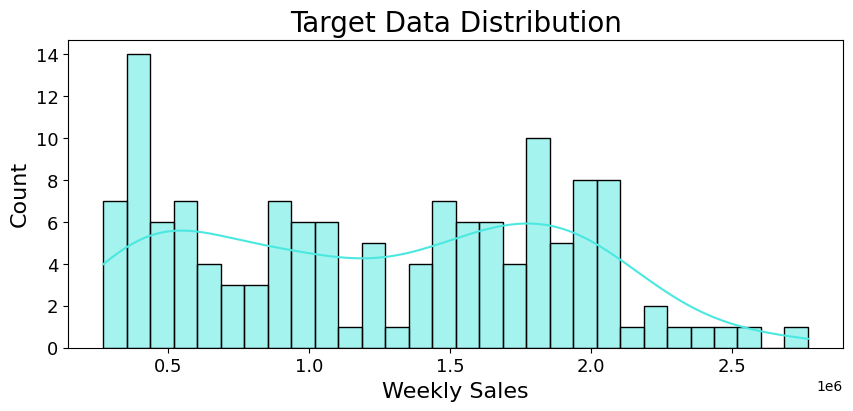

In [17]:

#plotting label (Weekly Sales) data distribution

plt.figure(figsize=[10,4])
ax = sns.histplot(df["Weekly_Sales"], color ="#4BE8E0", kde = True, bins = 30)

plt.title("Target Data Distribution", fontsize = 20)
bigger_ticks_font_size(ax)
bigger_label_font_size(ax, "Weekly Sales", "Count")

plt.show()

#### It can be said that the distribution of our target data does not have a normal distribution because it tends to be skewed to the right.

### Data Distribution: Numerical Features

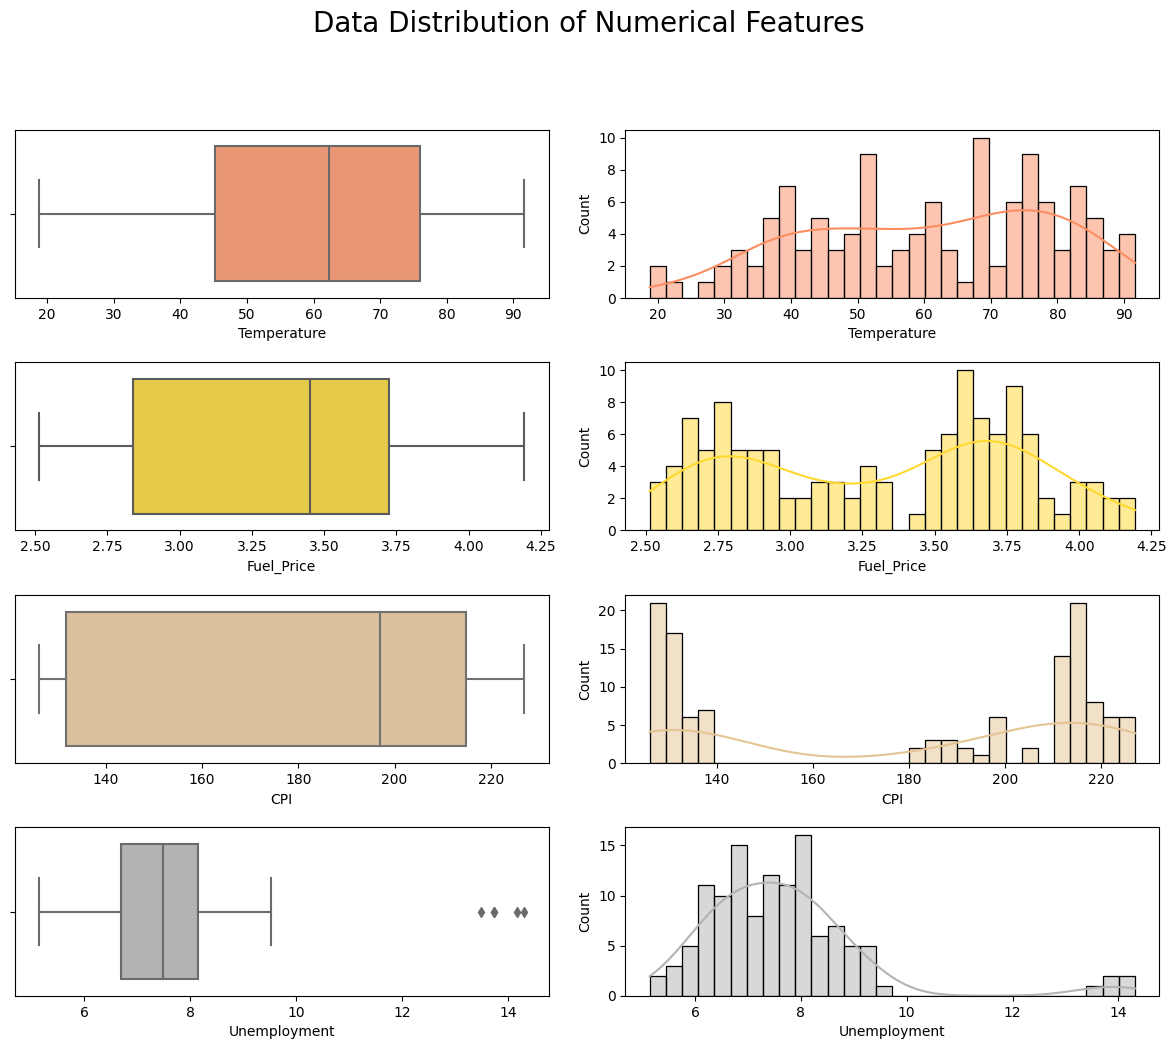

In [18]:

# Outlier plotting using boxplot

fig, ax = plt.subplots(ncols = 2, nrows = len(features_outliers), figsize=(12, 10))
for i in enumerate (features_outliers):
  sns.boxplot(x = df[i[1]], data = df, color = palette[i[0]], ax = ax[i[0]][0])
  sns.histplot(x = df[i[1]], color = palette[i[0]], kde = True, bins = 30, ax = ax[i[0]][1])

fig.suptitle("Data Distribution of Numerical Features", fontsize = 20, y=1.05)
sns.set_context(font_scale = 5)
plt.tight_layout(pad = 1.5)
     

## Almost all of these columns have data that are almost normally distributed, except for the CPI column.

### The temperature column is arguably the closest to the normal distribution.
### Fuel_Price column has 2 peaks.
### The Unemployment column is slightly skewed to the left.
### The Temperature column, and Unemployment has outliers. We will deal with this in the next stage.

In [19]:
# Deleting outliers from numeric columns
def drop_outliers(df, col_name):
    to_keep = (df[col_name].isnull()) | ((df[col_name] < df[col_name].mean() + 3 * df[col_name].std()) & 
               (df[col_name] > df[col_name].mean() - 3 * df[col_name].std()))
    
    df = df.loc[to_keep,:]
    
    return(df)

list_net=['Temperature', 'Fuel_Price', 'CPI' , 'Unemployment']

for i in list_net:                            # boucle pour chaque élément dans list_net
    df = drop_outliers(df,i)

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,2011-02-18,1572117.54,0.0,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,NaT,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [20]:
df.shape[0]

131

# DATA ANALYSIS

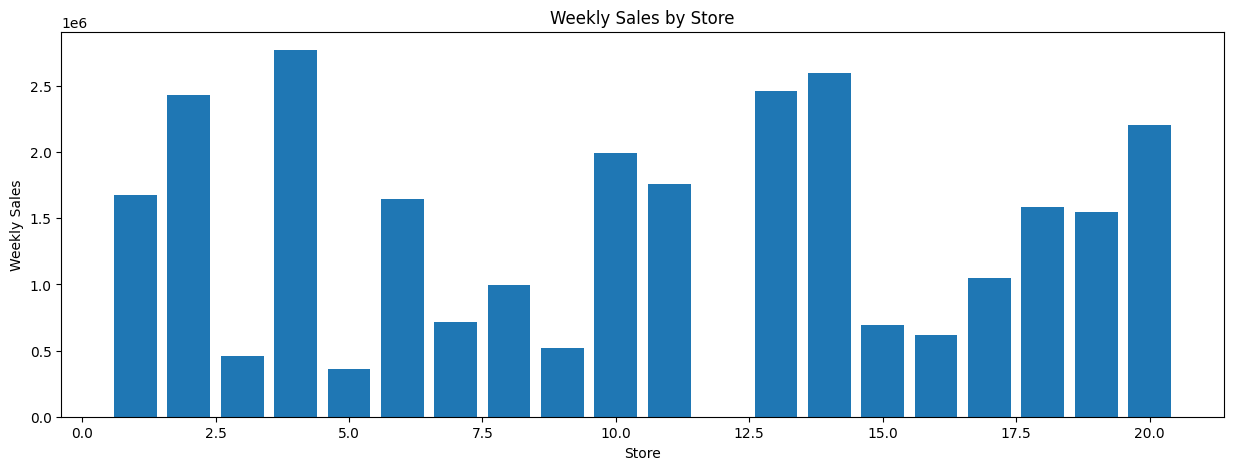

In [21]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.bar(x,y)
plt.show()

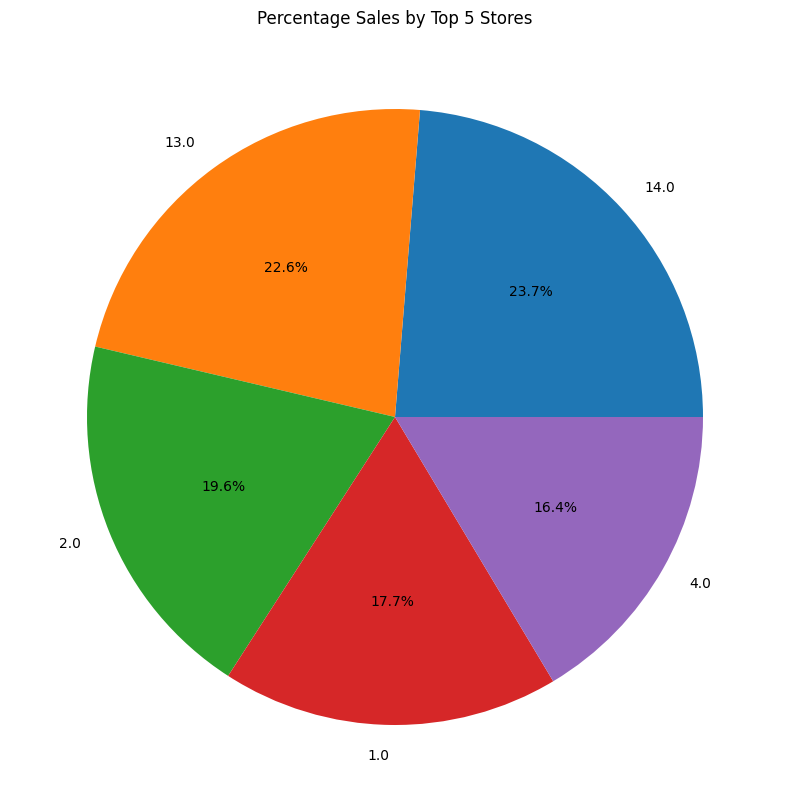

In [22]:
top_stores = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(5)
store_percentages = (top_stores / top_stores.sum()) * 100

plt.figure(figsize=(10, 10))
plt.pie(store_percentages, labels=top_stores.index, autopct='%1.1f%%')
plt.title('Percentage Sales by Top 5 Stores')
plt.show()

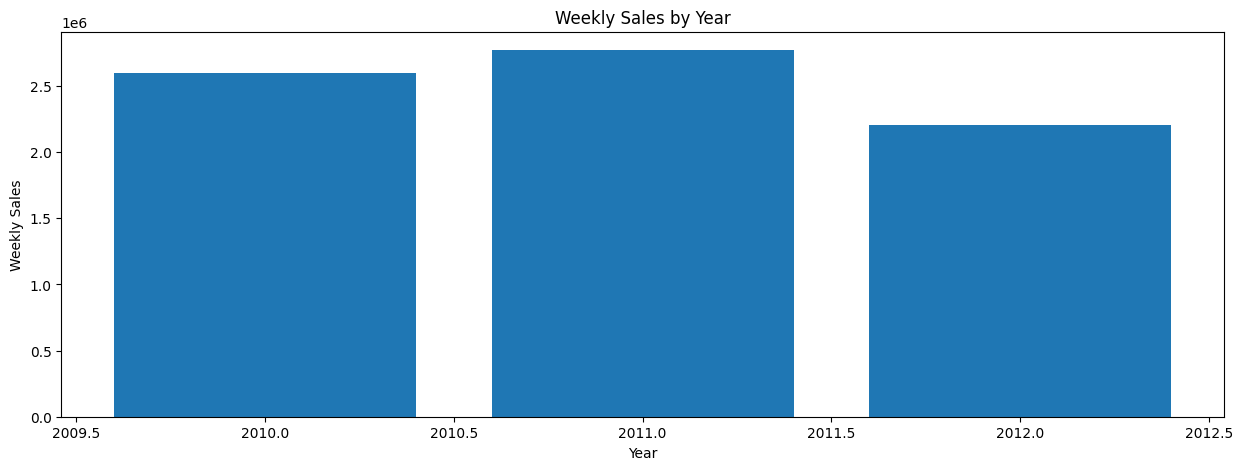

In [23]:
x = df['Year']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.bar(x,y)
plt.show()

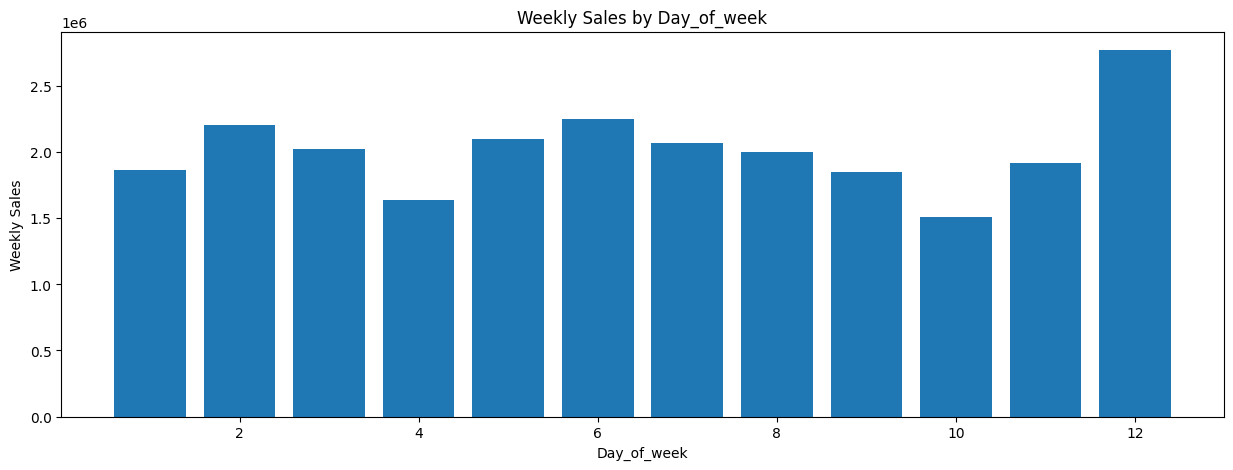

In [24]:
x = df['Month']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by month')
plt.xlabel('Day_of_week')
plt.ylabel('Weekly Sales')
plt.bar(x,y)
plt.show()

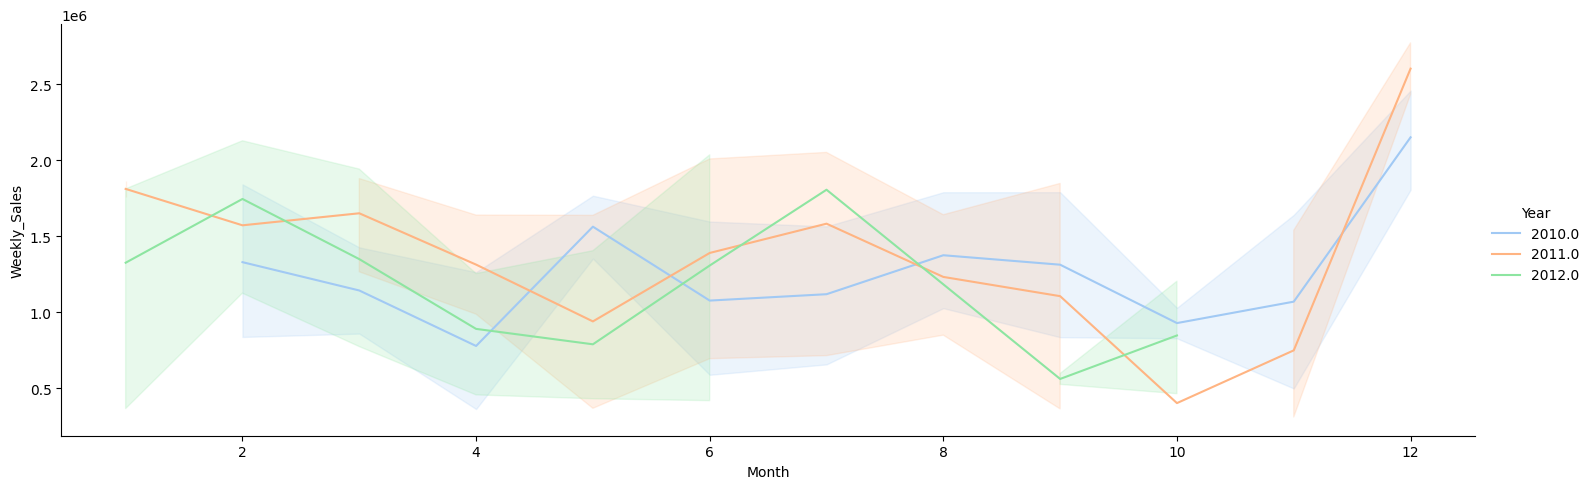

In [25]:
sns.relplot(
        x=df['Month'],
        y=df['Weekly_Sales'],
        hue= df['Year'],
        data = df,
        kind='line',
        height=5,
        aspect=3,
        palette='pastel'
       
        
    )
plt.show()

In [26]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0.0    123
1.0      8
Name: count, dtype: int64

In [27]:
df_holiday = df.loc[df['Holiday_Flag']==True]
df_holiday['Date'].unique() 

<DatetimeArray>
['2012-02-10 00:00:00',                 'NaT', '2010-02-12 00:00:00',
 '2010-12-31 00:00:00', '2010-11-26 00:00:00', '2012-09-07 00:00:00']
Length: 6, dtype: datetime64[ns]

In [28]:
df_holiday.sort_values('Weekly_Sales', ascending=False)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
33,14.0,2012-02-10,2077256.24,1.0,37.00,NaN,NaN,8.424,2012.0,2.0,10.0,4.0
110,20.0,2010-12-31,1799737.79,1.0,28.85,3.179,204.643227,7.484,2010.0,12.0,31.0,4.0
114,11.0,2010-11-26,1757242.51,1.0,69.90,2.735,215.061403,7.564,2010.0,11.0,26.0,4.0
42,1.0,NaT,1661767.33,1.0,NaN,3.730,222.439015,6.908,NaN,NaN,NaN,NaN
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106,2010.0,2.0,12.0,4.0
107,8.0,2010-02-12,994801.40,1.0,33.34,2.548,214.621419,6.299,2010.0,2.0,12.0,4.0
122,7.0,2012-09-07,597876.55,1.0,57.84,3.596,198.095048,7.872,2012.0,9.0,7.0,4.0
32,7.0,2012-02-10,563460.77,1.0,18.79,3.103,196.919506,8.256,2012.0,2.0,10.0,4.0


In [29]:
df_not_holiday = df.loc[df['Holiday_Flag']==False]
df_not_holiday['Date'].nunique() 

73

In [30]:
df_not_holiday.sort_values('Weekly_Sales', ascending=False)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
64,4.0,2011-12-16,2771397.17,0.0,36.44,3.149,129.898065,5.143,2011.0,12.0,16.0,4.0
8,14.0,2010-12-10,2600519.26,0.0,30.54,3.109,NaN,NaN,2010.0,12.0,10.0,4.0
72,13.0,2010-12-10,2461468.35,0.0,36.78,2.817,126.793400,7.795,2010.0,12.0,10.0,4.0
18,2.0,2011-12-16,2432736.52,0.0,50.13,NaN,NaN,7.441,2011.0,12.0,16.0,4.0
103,4.0,2010-12-10,2302504.86,0.0,42.40,2.860,126.793400,7.127,2010.0,12.0,10.0,4.0
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010.0,6.0,18.0,4.0
7,20.0,2012-02-03,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012.0,2.0,3.0,4.0
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN,2010.0,2.0,19.0,4.0
60,14.0,2011-05-06,2095599.93,0.0,NaN,4.046,185.937438,8.521,2011.0,5.0,6.0,4.0
106,14.0,2010-02-26,2095591.63,0.0,34.89,NaN,NaN,8.992,2010.0,2.0,26.0,4.0


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

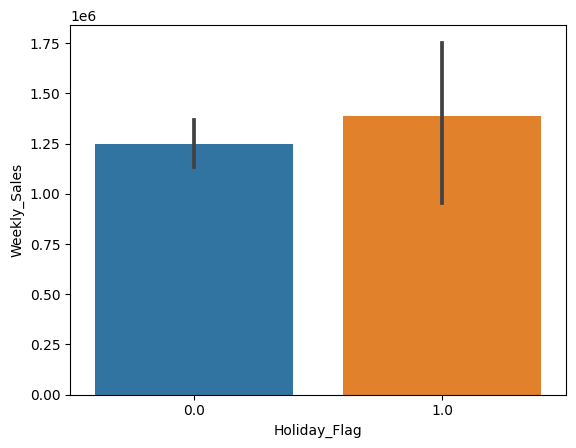

In [31]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

In [32]:
# Dropping the Date column from the DataFrame
df.drop('Date', axis=1, inplace=True)


# Display the modified dataframe
print(df)

     Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI   
0      6.0    1572117.54           0.0        59.61       3.045  214.777523  \
1     13.0    1807545.43           0.0        42.38       3.435  128.616064   
3     11.0    1244390.03           0.0        84.57         NaN  214.556497   
4      6.0    1644470.66           0.0        78.89       2.759  212.412888   
5      4.0    1857533.70           0.0          NaN       2.756  126.160226   
6     15.0     695396.19           0.0        69.80       4.069  134.855161   
7     20.0    2203523.20           0.0        39.93       3.617  213.023622   
8     14.0    2600519.26           0.0        30.54       3.109         NaN   
9      3.0     418925.47           0.0        60.12       3.555  224.132020   
10     8.0     895066.50           0.0        82.92       3.554  219.070197   
11    18.0    1029618.10           0.0        52.02       2.878  132.763355   
12     7.0     414094.05           0.0        36.61 

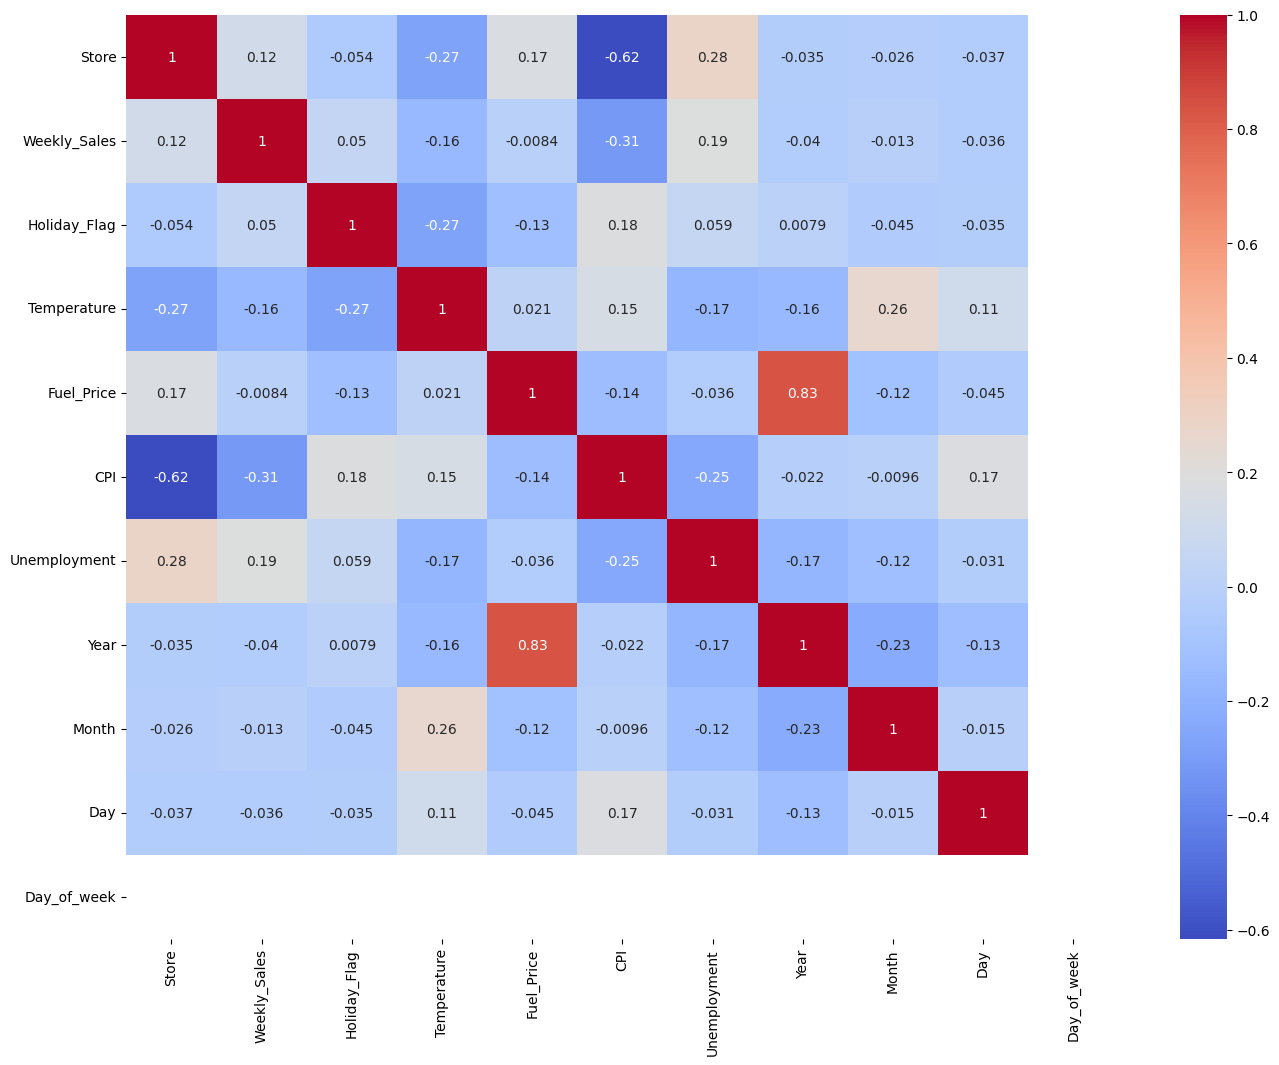

In [33]:
# Plotting a matrix correlation of features
corr = df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [34]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,0.0,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


## Machine Learning

In [35]:
# Separating numerical and categorical features
numeric_features = ["Temperature", "Fuel_Price", "CPI", "Unemployment", "Year", "Month", "Day", "Day_of_week"]
categorical_features = ["Store", "Holiday_Flag"]

In [36]:
# Divide dataset Train set and Test set 
print("Dividing into and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Done...")
print()

Dividing into and test sets...
Done...



### Training Pipeline

In [37]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Preprocessing

In [38]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) 
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment   
12     7.0           0.0        36.61       3.767  192.826069         8.595  \
74     1.0           0.0        67.97       3.594  223.425723           NaN   
143    3.0           0.0        78.53       2.705  214.495838         7.343   
83    15.0           0.0        79.97       3.972  135.873839         7.806   
92     3.0           0.0          NaN       2.667  214.702765           NaN   

       Year  Month   Day  Day_of_week  
12   2011.0    5.0  13.0          4.0  
74   2012.0   10.0  19.0          4.0  
143  2010.0    6.0   4.0          4.0  
83      NaN    NaN   NaN          NaN  
92      NaN    NaN   NaN          NaN  
...Done.
[[-1.42842460e+00  9.10729971e-01  3.72122515e-01  6.35650714e-01
   2.09587789e-01 -3.38797086e-01 -5.10451138e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  0

### Train model

### 1. Linear regression

In [39]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [40]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")


Predictions on training set...
...Done.
Predictions on test set...
...Done.


### Performance assessment

In [41]:
# Printing scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
# print("Standard deviation on train set :", cross_val_score(regressor, X_train, Y_train, cv=10, scoring='r2').std())
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))


R2 score on training set :  0.9738226270103044
R2 score on test set :  0.9391089500202596


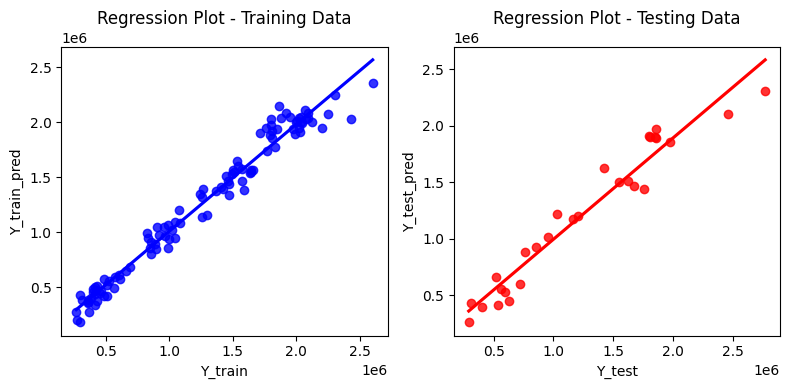

In [42]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # Adjust the figure size if needed

# First Graph: Training Data
sns.regplot(x=Y_train, y=Y_train_pred, ci=None, color="blue", ax=axes[0])
axes[0].set_xlabel("Y_train")
axes[0].set_ylabel("Y_train_pred")
axes[0].set_title("Regression Plot - Training Data", y=1.05)

# Second Graph: Testing Data
sns.regplot(x=Y_test, y=Y_test_pred, ci=None, color="red", ax=axes[1])
axes[1].set_xlabel("Y_test")
axes[1].set_ylabel("Y_test_pred")
axes[1].set_title("Regression Plot - Testing Data", y=1.05)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In [43]:
# Let's have a look at the coefficients
regressor.coef_

array([[-4.10540319e+04, -1.30092123e+04,  7.53470556e+04,
        -8.54554066e+04, -2.69117611e+04,  4.68054279e+04,
        -3.02204078e+04,  3.72529030e-09,  4.31469092e+05,
        -1.16168286e+06,  6.38696504e+05, -1.28524911e+06,
         5.57690782e+04, -9.86819990e+05, -7.29334069e+05,
        -1.08522333e+06,  5.50966409e+05, -1.51432852e+05,
         8.04055842e+03,  5.22659554e+05,  6.48681823e+05,
        -7.03604064e+05, -1.04931186e+06, -5.86655730e+05,
        -2.02340921e+05,  4.84675293e+04,  3.73672715e+05,
        -2.37685854e+04]])

### Feature importance

In [44]:
# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
#     if name == 'num': # if pipeline is for numeric variables
#         features = features_list # just get the names of columns to which it has been applied
#     else: # if pipeline is for categorical variables
#         features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
#     column_names.extend(features) # concatenate features names
        
# print("Names of columns corresponding to each coefficient: ", column_names)

# # Create a pandas DataFrame
# coefs = pd.DataFrame(index = column_names, data = {"ridge1":ridge1.coef_,"ridge2":ridge2.coef_,"ridge3":ridge3.coef_})
# coefs.head()

In [45]:
# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_:
#     if name in ['num', 'cat']:
#         features = features_list
#         column_names.extend(features)
# print("Names of columns corresponding to each coefficient: ", column_names)

In [46]:
# Get the name of the features created during preprocessing
column_names = []
for name, pipeline, features_list in preprocessor.transformers_:
    if name == "num":
        features = features_list
    else:
        features = pipeline.named_steps["encoder"].get_feature_names_out()
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_week', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [47]:
type(column_names)

list

In [48]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day_of_week
0,6.0,0.0,59.61,3.045,214.777523,6.858,2011.0,2.0,18.0,4.0
1,13.0,0.0,42.38,3.435,128.616064,7.470,2011.0,3.0,25.0,4.0
3,11.0,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN,NaN
4,6.0,0.0,78.89,2.759,212.412888,7.092,2010.0,5.0,28.0,4.0
5,4.0,0.0,NaN,2.756,126.160226,7.896,2010.0,5.0,28.0,4.0


In [49]:
print(len(column_names))
print(len(regressor.coef_))

28
1


In [50]:
print(len(regressor.coef_.transpose()))

28


In [51]:
# # Get the name of the features created during preprocessing
# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
#     if name == 'num' , 'cat': # if pipeline is for numeric variables
#         features = features_list # just get the names of columns to which it has been applied
#     # elif: # if pipeline is for categorical variables
#     #     features == 'cat': # get output columns names from OneHotEncoder
#     #     features2 = features_list # just get the names of columns to which it has been applied
#     column_names.extend(features) # concatenate features names
        

# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_:
#     if name in ['num', 'cat']:
#         features = features_list
#         column_names.extend(features)
# print("Names of columns corresponding to each coefficient: ", column_names)

# Create a dataframe for the coefficients
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])

# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by="coefficients")
feature_importance

,coefficients
Day_of_week,3.725290e-09
Store_12.0,8.040558e+03
Fuel_Price,1.300921e+04
Holiday_Flag_1.0,2.376859e+04
Year,2.691176e+04
Day,3.022041e+04
Temperature,4.105403e+04
Month,4.680543e+04
Store_19.0,4.846753e+04
Store_6.0,5.576908e+04


In [52]:
# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_:
#     if name in ['num', 'cat']:
#         features = features_list
#         column_names.extend(features)
# print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day_of_week', 'Store', 'Holiday_Flag']


In [53]:
# feature_names = list(preprocessor.transformers_[0][1].get_feature_names_out()) + list(preprocessor.transformers_[1][1].get_feature_names_out())

# coefs = pd.DataFrame(
#    regressor.coef_,
#    columns=['Coefficients'], index=column_names
# )

# coefs.plot(kind='barh')
# plt.title('Linear Regression')
# plt.show()

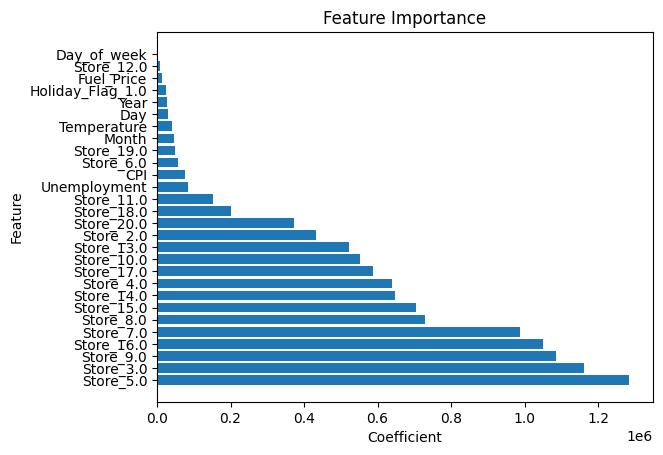

In [54]:
# Convert index and values to lists
feature_names = feature_importance.index.to_numpy()
importance_values = feature_importance.values
importance_values_reshape = importance_values.ravel() # from 2d to 1d array

# Plot coefficients
plt.barh(feature_names, importance_values_reshape)
plt.gca().invert_yaxis()  # Invert y-axis for orientation
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [65]:
# # get column names from the preprocessor
# column_names = []
# for name, pipeline, features_list in preprocessor.transformers_: 
#     if name == 'num': 
#         features = features_list 
#     else: 
#         features = pipeline.named_steps['encoder'].get_feature_names_out() 
#     column_names.extend(features)

# # store coefficients in a dataframe
# coefs1 = pd.DataFrame(index = range(0,len(regressor.coef_)), columns = ["features", "coefficients"])
# coefs1["features"] = column_names
# coefs1["coefficients"] = abs(regressor.coef_)

# # get feature importance
# feature_importance1 = coefs1.sort_values("coefficients", ascending = False).reset_index(drop = True)

# # plot feature importance
# fig4 = go.Figure([go.Bar(
#     x = feature_importance1.loc[:,"features"],
#     y = feature_importance1.loc[:,"coefficients"],
#     marker_color = px.colors.qualitative.Vivid)])

# # update layout
# fig4.update_xaxes(tickfont = dict(size = 10), tickangle = 90)
# fig4.update_yaxes(tickfont = dict(size = 10))
# fig4.update_layout(
#         margin = dict(l = 120),
#         title_text = "Figure 4. Baseline model feature importance",
#         title_x = 0.5,
#         title_y = 0.95,
#         title_font_size = 18,
#         xaxis = dict(title = "Features"),
#         yaxis = dict(title = "Coefficients", range = [-50000, 1600000], tickvals = [0, 500000,1000000,1500000]),
#         showlegend = False,
#         plot_bgcolor = "rgba(0,0,0,0)",
#         paper_bgcolor = "rgb(232,232,232)",
#         width = 800,
#         height = 400)

# fig4.show()

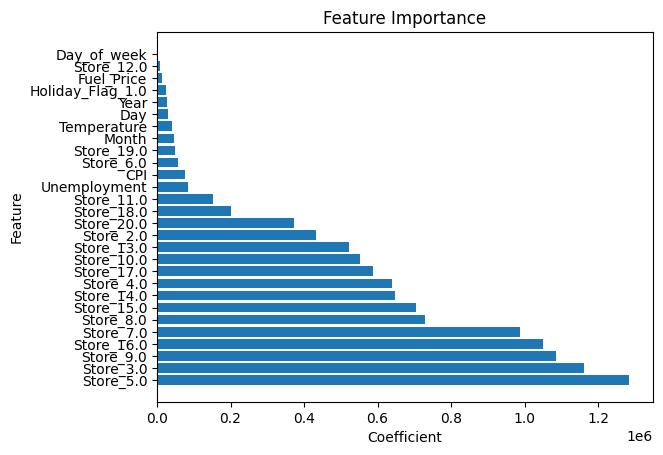

In [56]:
# Convert index and values to lists
feature_names = feature_importance.index.to_numpy()
importance_values = feature_importance.values
importance_values_reshape = importance_values.ravel() # from 2d to 1d array

# Plot coefficients
plt.barh(feature_names, importance_values_reshape)
plt.gca().invert_yaxis()  # Invert y-axis for orientation
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

The store ID variables are the most frequently utilized by our model for making predictions

## Fighting overfitting

#### Ridge

In [66]:
# Perform grid search
print("Grid search...")
regressor_ridge = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.01, 0.03, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]
}
best_ridge = GridSearchCV(regressor_ridge, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.05}
Best R2 score :  0.9374431456986325


### Lasso

In [72]:
# Perform grid search
print("Grid search...")
regressor_lasso = Lasso()
# Grid of values to be tested
params = {
    'alpha': [1, 2, 3, 5, 10, 20, 30, 50, 100]
}
best_lasso = GridSearchCV(regressor_lasso, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 100}
Best R2 score :  0.9372542475822179


In [73]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", best_ridge.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", best_ridge.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", best_lasso.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", best_lasso.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.9735063868931944
RIDGE / R2 score on test set :  0.9369566742858336

LASSO / R2 score on training set :  0.97380467746818
LASSO / R2 score on test set :  0.9391140715155624


### Conclusion


Our model appears to exhibit significant robustness. The R² value on the test set is notably high, and the R² on the training set is also substantial, closely resembling the outcome from the training.

There is minimal evidence of overfitting with the dataset we have sampled, as regularization has only a slight impact on the results in our context.

To ensure the model's robustness for production use, obtaining additional data would be necessary.